0 0.5385401248931885
1 0.499862939119339
2 0.47787025570869446
3 0.4651850759983063
4 0.4576931297779083
5 0.45309963822364807
6 0.45012447237968445
7 0.44805362820625305
8 0.44648873805999756
9 0.445207417011261
10 0.44408565759658813
20 0.43475276231765747
30 0.4259403944015503
40 0.4173913598060608
50 0.4090970754623413
60 0.4010498821735382
70 0.39324232935905457
80 0.38566720485687256
90 0.37831756472587585
1000 0.15107394754886627
2000 0.1292257159948349
3000 0.12101589888334274
4000 0.11387030780315399
5000 0.10717231780290604
6000 0.10086967051029205
7000 0.09493779391050339
8000 0.08935479819774628
9000 0.08410023152828217
10000 0.07915470004081726
11000 0.07450009137392044
12000 0.0701192319393158
13000 0.06599602103233337
14000 0.062115378677845
15000 0.058462951332330704
16000 0.0550253763794899
17000 0.051789991557598114
18000 0.04874490946531296
19000 0.04587893187999725
20000 0.04318149760365486
21000 0.04064270108938217
22000 0.03825334459543228
23000 0.0360045023262500

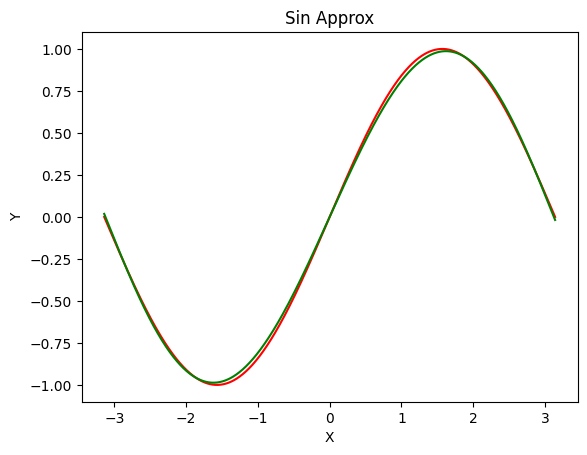

In [21]:
import torch
import math
import matplotlib.pyplot as plt

dtype = torch.float
device = "cuda" if torch.cuda.is_available() else "cpu"
torch.set_default_device(device)

# Create Tensors to hold input and outputs.
# By default, requires_grad=False, which indicates that we do not need to
# compute gradients with respect to these Tensors during the backward pass.
x = torch.linspace(-math.pi, math.pi, 1000, dtype=dtype)
y = torch.sin(x)

# Create random Tensors for weights. For a third order polynomial, we need
# 4 weights: y = a + b x + c x^2 + d x^3
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.
std = 1e-3
a = torch.normal(0, std, (), dtype=dtype, requires_grad=True)
b = torch.normal(0, std, (), dtype=dtype, requires_grad=True)
c = torch.normal(0, std, (), dtype=dtype, requires_grad=True)
d = torch.normal(0, std, (), dtype=dtype, requires_grad=True)
e = torch.normal(0, std, (), dtype=dtype, requires_grad=True)
f = torch.normal(0, std, (), dtype=dtype, requires_grad=True)

learning_rate = 1e-4
for t in range(100000):
    # Forward pass: compute predicted y using operations on Tensors.
    y_pred = a + (b * x) + (c * x ** 2) + (d * x ** 3) + (e * x ** 4) + (f * x ** 5)

    # Compute and print loss using operations on Tensors.
    # Now loss is a Tensor of shape (1,)
    # loss.item() gets the scalar value held in the loss.
    loss = (y_pred - y).pow(2).sum() / y.shape[0]
    if t < 10 or (t < 100 and t % 10 == 0) or t % 1000 == 0:
        print(t, loss.item())

    # Use autograd to compute the backward pass. This call will compute the
    # gradient of loss with respect to all Tensors with requires_grad=True.
    # After this call a.grad, b.grad. c.grad and d.grad will be Tensors holding
    # the gradient of the loss with respect to a, b, c, d respectively.
    loss.backward()

    # Manually update weights using gradient descent. Wrap in torch.no_grad()
    # because weights have requires_grad=True, but we don't need to track this
    # in autograd.
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad
        e -= learning_rate * e.grad
        f -= learning_rate * f.grad

        # Manually zero the gradients after updating weights
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None
        e.grad = None
        f.grad = None

print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3 + {e.item()} x^4 + {f.item()} x^5')


_y = []

for _x in x:
    res = math.sin(_x)
    approx_res = a + (b * _x) + (c * _x ** 2) + (d * _x ** 3) + (e * _x ** 4) + (f * _x ** 5)
    _y.append(approx_res)


plt.plot(torch.Tensor.cpu(x), torch.Tensor.cpu(y), color='r', label='sin')
plt.plot(torch.Tensor.cpu(x), torch.Tensor.cpu(torch.tensor(_y)), color='g', label='approx')
plt.xlabel('X')
plt.ylabel('Y')
plt.title("Sin Approx")
plt.show()
